In [1]:
# Set up interactive plotting using matplotlib, and load numpy
# %pylab ipympl
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to load a pipeline from a file.

## Setup

Make sure you have PODPAC installed with the **datatype** optional dependencies:

```
$ pip install podpac[datatype]
```

# 1: Set up and execute pipeline
## 1.0: Define the pipeline json

In [2]:
import time
import ipywidgets as widgets
import podpac
import podpac.datalib.gfs 

In [3]:
date = time.localtime()

In [4]:
date.tm_mon

2

In [5]:
value='''
{
    "GFSSource": {
        "node": "datalib.gfs.GFSSourceRaw",
        "attrs": {
            "band": 1,
            "date": "%04d%02d%02d",
            "forecast": "003",
            "hour": "1200",
            "interpolation": "nearest",
            "level": "0-10 m DPTH",
            "parameter": "SOIM"
        }
    },
    "podpac_version": "2.0.0"
}       

''' % (date.tm_year, date.tm_mon, date.tm_mday - 2)
pipeline_json = widgets.Textarea(description='Pipeline Definition', 
                                 disabled=False, 
                                 layout=widgets.Layout(width='50%', height='400px'),
                                 placeholder='{}',
                                 value=value
                                )
pipeline_json

Textarea(value='\n{\n    "GFSSource": {\n        "node": "datalib.gfs.GFSSourceRaw",\n        "attrs": {\n    …

## 1.1: Create the pipeline

In [6]:
sm = podpac.Node.from_json(pipeline_json.value)

## 1.3: Evaluate and plot the node for the world

In [7]:
# dim =            (start, stop, step)
lat = podpac.crange(   90,  -90,-2.0)
lon = podpac.crange( -0,  360, 2.0)
# dim = value
time = '{}-05-19T12'.format(date.tm_year)

c_world = podpac.Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])
o = sm.eval(c_world)

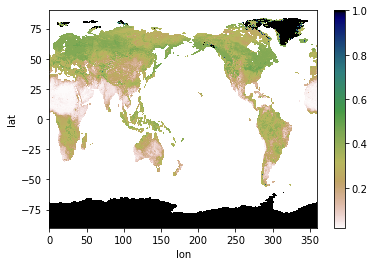

In [8]:
figure()
o.plot(cmap='gist_earth_r')